# Assignment 4: Regularization
*<span style="float:right;">Norine NDOUDI</span>*


(211, 2)
(211, 1)


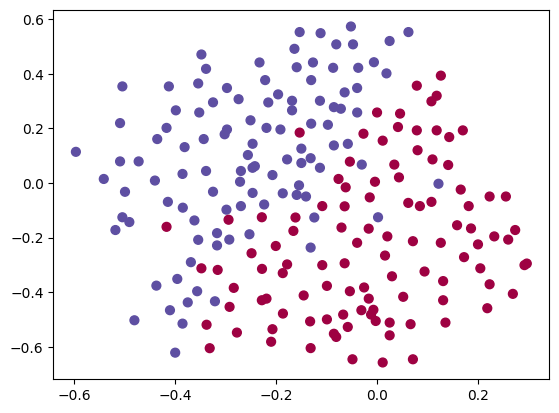

In [23]:
import scipy.io
import matplotlib.pyplot as plt

data = scipy.io.loadmat('data.mat')
train_X = data['X'].T
train_y = data['y'].T
test_X = data['Xval'].T
test_y = data['yval'].T

plt.scatter(train_X[0, :], train_X[1, :], c=train_y[0, :], s=40, cmap=plt.cm.Spectral);
print(train_X.T.shape)
print(train_y.T.shape)

# Design a neural network w/o regularization

Because we want a complex network and we want to build a overfitted non-linear decision boundary, we will take a large number of hidden units (neurons) and we will use 3 hidden layers and the output layer using the sigmoid activation function.

In [24]:
from keras import models
from keras import layers

model_noreg = models.Sequential()

#Add a fully connected layer of 256 neurons which has for input elements with the dimension of input vector (train_X).
model_noreg.add(layers.Dense(256, activation='relu', input_shape=(2,)))

#Add a second fully connected layer, the data from the first layer is transmitted to this one.
model_noreg.add(layers.Dense(128, activation='relu'))

model_noreg.add(layers.Dense(128, activation='relu'))

#Add a last layer that will output the scalar prediction between 0 and 1.
model_noreg.add(layers.Dense(1, activation='sigmoid'))

#Configure the model with the rmsprop optimizer and the binary_crossentropy loss function. 
model_noreg.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

Again, we want a complex network with high epochs to build a overfitted non-linear decision boundary. In that case, we will train the model for 700 epochs

In [25]:
#Training the model
history = model_noreg.fit(train_X.T,
                    train_y.T,
                    epochs=1000,
                    validation_data=(test_X.T, test_y.T))

Epoch 1/1000
7/7 [==============================] - 5s 174ms/step - loss: 0.6539 - accuracy: 0.7536 - val_loss: 0.5730 - val_accuracy: 0.8500
Epoch 2/1000
7/7 [==============================] - 0s 55ms/step - loss: 0.5350 - accuracy: 0.8531 - val_loss: 0.4423 - val_accuracy: 0.8400
Epoch 3/1000
7/7 [==============================] - 0s 53ms/step - loss: 0.4223 - accuracy: 0.8531 - val_loss: 0.3524 - val_accuracy: 0.8600
Epoch 4/1000
7/7 [==============================] - 0s 50ms/step - loss: 0.3538 - accuracy: 0.8483 - val_loss: 0.3011 - val_accuracy: 0.9000
Epoch 5/1000
7/7 [==============================] - 0s 67ms/step - loss: 0.2983 - accuracy: 0.8863 - val_loss: 0.2871 - val_accuracy: 0.9000
Epoch 6/1000
7/7 [==============================] - 0s 58ms/step - loss: 0.2745 - accuracy: 0.8910 - val_loss: 0.2649 - val_accuracy: 0.9050
Epoch 7/1000
7/7 [==============================] - 0s 69ms/step - loss: 0.2560 - accuracy: 0.9100 - val_loss: 0.2648 - val_accuracy: 0.9100
Epoch 8/1000

# Draw decision boundaries w/o regularization

9600/9600 [==============================] - 56s 6ms/step


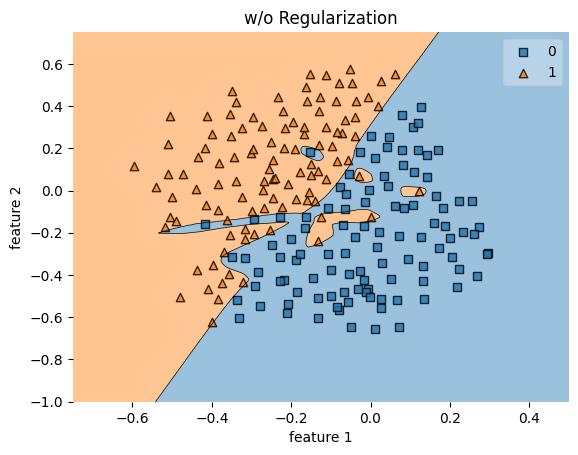

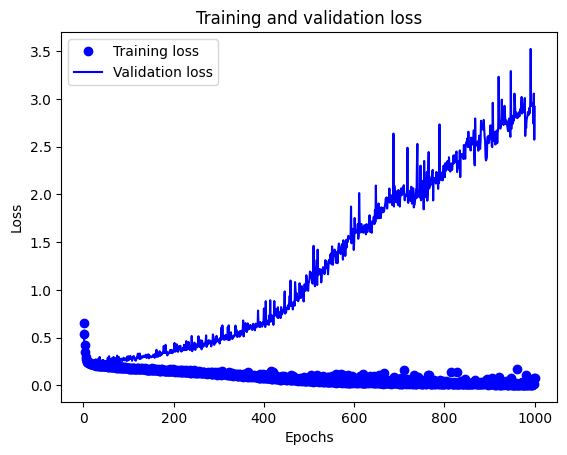

In [26]:
from mlxtend.plotting import plot_decision_regions

# Plot decision boundary
plot_decision_regions(X = train_X.T, y = train_y[0], clf=model_noreg)

plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('w/o Regularization')
plt.xlim(-0.75, 0.5)
plt.ylim(-1, 0.75)
plt.show()

#For me in order to visualize overfitting
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')           
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')      
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Evaluate the baseline model on the test data

In [28]:
#Evaluate baseline model on the test data.
results = model_noreg.evaluate(test_X.T, test_y.T)

print(results)

7/7 [==============================] - 0s 8ms/step - loss: 2.9176 - accuracy: 0.9100
[2.917645215988159, 0.9100000262260437]


The average loss is about 291% (which is a lot) and we have an accuracy of about 91%. The model correctly classified **91%** of the test set examples.  

# Design a neural network w/ regularization

In [29]:
import scipy.io
import matplotlib.pyplot as plt

data = scipy.io.loadmat('data.mat')
train_X = data['X'].T
train_y = data['y'].T
test_X = data['Xval'].T
test_y = data['yval'].T

To add $L_{2}$ regularization to the baseline model, we can use the [`kernel_regularizer` argument](https://keras.io/api/layers/regularizers/#l2-class).
<br> Because it is sometimes desirable to use a separate penalty 
with a different $\alpha$ coefficient for each layer of th 
netwo and after trying several values for $L_{2}$ regularization, I respectively took the following values for each layer :  
- For the first hidden layer, `l2=0.05`
- For the second hidden layer, `l2=0.03`
- For the last hidden layer, `l2=0.01`
` 
*<br><a style="float:right;" href="https://keras.io/api/layers/regularizers/#l2-class"> Keras website source</a>*

In [30]:
from keras import models
from keras import layers
from keras.regularizers import l2

model_L2 = models.Sequential()

model_L2.add(layers.Dense(256, activation='relu', input_shape=(2,), kernel_regularizer=l2(0.05)))

model_L2.add(layers.Dense(128, activation='relu', kernel_regularizer=l2(0.03)))

model_L2.add(layers.Dense(128, activation='relu', kernel_regularizer=l2(0.01)))

model_L2.add(layers.Dense(1, activation='sigmoid'))

model_L2.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

We'll train the model with the same amount of epoch than before, to see how the regularization help us with the overfitting model.

In [31]:
#Training the model
history = model_L2.fit(train_X.T,
                    train_y.T,
                    epochs=1000,
                    validation_data=(test_X.T, test_y.T))

Epoch 1/1000
7/7 [==============================] - 4s 140ms/step - loss: 6.4163 - accuracy: 0.7630 - val_loss: 5.5195 - val_accuracy: 0.8750
Epoch 2/1000
7/7 [==============================] - 0s 43ms/step - loss: 5.1297 - accuracy: 0.8389 - val_loss: 4.5974 - val_accuracy: 0.8300
Epoch 3/1000
7/7 [==============================] - 0s 37ms/step - loss: 4.3039 - accuracy: 0.8436 - val_loss: 3.8916 - val_accuracy: 0.8000
Epoch 4/1000
7/7 [==============================] - 0s 55ms/step - loss: 3.6509 - accuracy: 0.8294 - val_loss: 3.2935 - val_accuracy: 0.8600
Epoch 5/1000
7/7 [==============================] - 0s 43ms/step - loss: 3.0951 - accuracy: 0.8436 - val_loss: 2.7862 - val_accuracy: 0.8800
Epoch 6/1000
7/7 [==============================] - 0s 43ms/step - loss: 2.6251 - accuracy: 0.8483 - val_loss: 2.3539 - val_accuracy: 0.8700
Epoch 7/1000
7/7 [==============================] - 0s 44ms/step - loss: 2.2272 - accuracy: 0.8246 - val_loss: 1.9924 - val_accuracy: 0.8900
Epoch 8/1000

# Draw decision boundaries w/ regularization

9600/9600 [==============================] - 56s 6ms/step


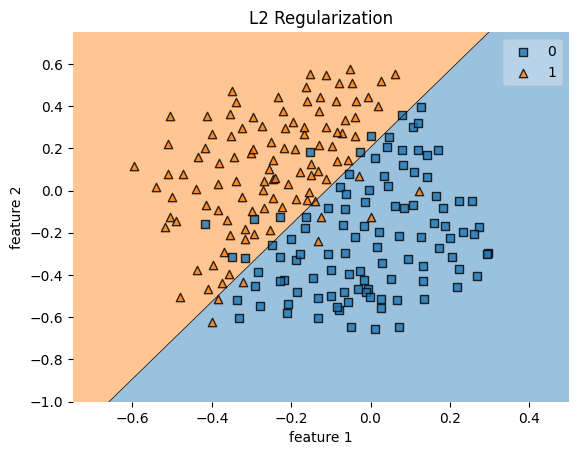

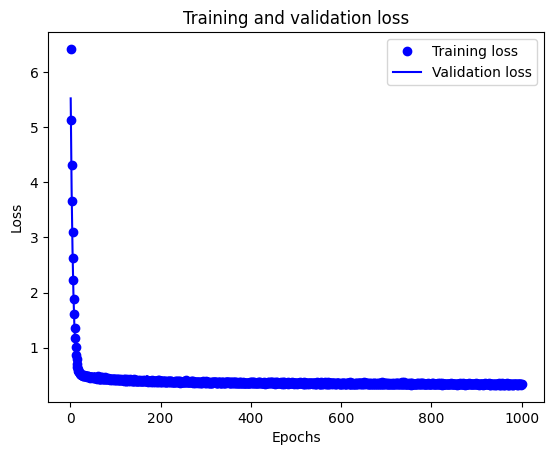

In [32]:
from mlxtend.plotting import plot_decision_regions

# Plot decision boundary
plot_decision_regions(X = train_X.T, y = train_y[0], clf=model_L2)

plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('L2 Regularization')
plt.xlim(-0.75, 0.5)
plt.ylim(-1, 0.75)
plt.show()

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')           
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')      
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

We can notice that with the addition of L2 regularization, we managed to control overfitting and avoided excessive fitting to the training data of the baseline model.

In [33]:
#Evaluate baseline model on the test data.
results = model_L2.evaluate(test_X.T, test_y.T)

print(results)

7/7 [==============================] - 0s 9ms/step - loss: 0.3520 - accuracy: 0.9200
[0.35202252864837646, 0.9200000166893005]


The average loss is about 35% (we reduced it) and we have an accuracy of about 88%. The model correctly classified **92%** of the test set examples.  

# Design a neural network w/ Dropout regularization

In [34]:
import scipy.io
import matplotlib.pyplot as plt

data = scipy.io.loadmat('data.mat')
train_X = data['X'].T
train_y = data['y'].T
test_X = data['Xval'].T
test_y = data['yval'].T

Dropout serves as a regularization method where randoml neurons are selected and are ignored during training. The Dropout layer functions randomly setting a portion of input units to 0 with a specified frequency at each training step. This technique is employed to mitigate the risk of overfitting.  
I will use the tips giving by [this website](https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/) regarding what we should do using Dropout.

So we will
- Use a small dropout value of 20% of neurons
- Use Dropout on incoming (visible) as well as hidden units

And because we have some layers more complex with more units we will use different dropout probabilities for those  layers.

In [35]:
from keras import models
from keras import layers
from keras.layers import Dropout
model_Dropout = models.Sequential()

##Dropout on incoming units
model_Dropout.add(Dropout(0.4, input_shape=(2,)))

model_Dropout.add(layers.Dense(256, activation='relu'))

#Dropout on hidden units
model_Dropout.add(Dropout(0.3, input_shape=(2,)))

model_Dropout.add(layers.Dense(128, activation='relu'))

model_Dropout.add(Dropout(0.2, input_shape=(2,)))

model_Dropout.add(layers.Dense(128, activation='relu'))

model_Dropout.add(Dropout(0.2, input_shape=(2,)))

model_Dropout.add(layers.Dense(1, activation='sigmoid'))

model_Dropout.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [36]:
#Training the model
history = model_Dropout.fit(train_X.T,
                    train_y.T,
                    epochs=1000,
                    validation_data=(test_X.T, test_y.T))

Epoch 1/1000
7/7 [==============================] - 5s 153ms/step - loss: 0.6716 - accuracy: 0.6398 - val_loss: 0.6143 - val_accuracy: 0.8050
Epoch 2/1000
7/7 [==============================] - 0s 39ms/step - loss: 0.6267 - accuracy: 0.6730 - val_loss: 0.5337 - val_accuracy: 0.8300
Epoch 3/1000
7/7 [==============================] - 0s 44ms/step - loss: 0.5792 - accuracy: 0.7156 - val_loss: 0.4614 - val_accuracy: 0.8650
Epoch 4/1000
7/7 [==============================] - 0s 44ms/step - loss: 0.5710 - accuracy: 0.7062 - val_loss: 0.4168 - val_accuracy: 0.8600
Epoch 5/1000
7/7 [==============================] - 0s 41ms/step - loss: 0.5495 - accuracy: 0.6872 - val_loss: 0.3950 - val_accuracy: 0.8500
Epoch 6/1000
7/7 [==============================] - 0s 36ms/step - loss: 0.4807 - accuracy: 0.7488 - val_loss: 0.3599 - val_accuracy: 0.8700
Epoch 7/1000
7/7 [==============================] - 0s 45ms/step - loss: 0.4555 - accuracy: 0.7488 - val_loss: 0.3487 - val_accuracy: 0.8750
Epoch 8/1000

# Draw decision boundaries w/ Dropout Regularization

9600/9600 [==============================] - 57s 6ms/step


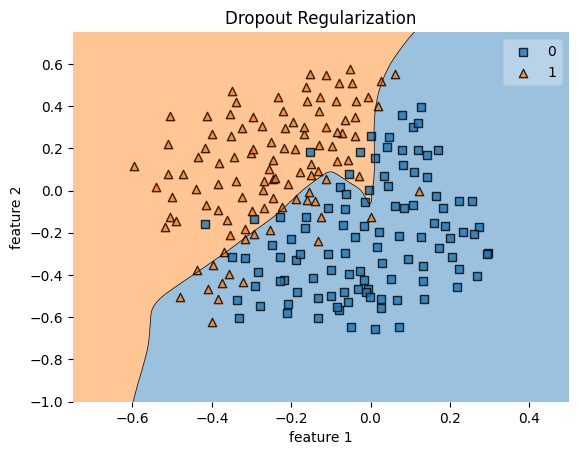

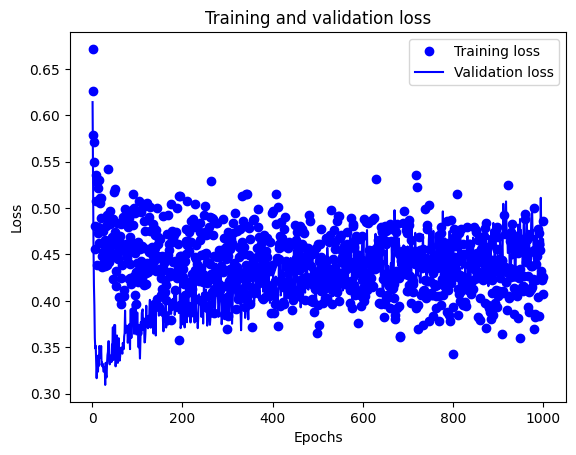

In [37]:
from mlxtend.plotting import plot_decision_regions

# Plot decision boundary
plot_decision_regions(X = train_X.T, y = train_y[0], clf=model_Dropout)

plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('Dropout Regularization')
plt.xlim(-0.75, 0.5)
plt.ylim(-1, 0.75)
plt.show()

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')           
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')      
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [38]:
#Evaluate baseline model on the test data.
results = model_Dropout.evaluate(test_X.T, test_y.T)

print(results)

7/7 [==============================] - 0s 10ms/step - loss: 0.4598 - accuracy: 0.8700
[0.45983317494392395, 0.8700000047683716]


The average loss is about 45% and we have an accuracy of about 87%. The model correctly classified **87%** of the test set examples.  

# Compare the accuracy between the models on the test dataset

As we saw, here the result of the average loss and the average accuracy for each model:  

- Baseline model : **Average loss** is about 291% and  an **accuracy** of about 91%.     
- L2 regularization model : **Average loss** is about 35% and an **accuracy** of about 88%. The model correctly classified **92%** of the test set examples.
- Dropout regularization model : **Average loss** is about 45% and an **accuracy** of about 88%. The model correctly classified **87%** of the test set examples.

The baseline model has almost the highest accuracy (as the L2 regularization model) on the test set with an accuracy of 91%. But, its loss is very high (291%), indicating an overfitting issue.
The L2 Regularization and Dropout Regularization models achieve almost an identical accuracy score on the test set with 87% for the dropout regularization and 92% for the L2 one. Moreover, their average loss is better than the baseline models with 35% and 45%. Then, both models exhibit better generalization compared to the baseline model, and the L2 regularization has a better generalization than the dropout one.